# Travelling Salesman America

This exercise uses the same algorithm of the past one but it includes parallel computing with 10 nodes (Continent) and American capitals coordinates (50 cities). The main concept is straightforward: every 20 epochs, Continent 0 chooses randomly a giver and a receiver and then the giver broadcasts its best cities sequence to the receiver. In this way, 10 different codes work at the same time and share their information: convergence to the best model should be faster. 

Cost function of Continent 0 is reported in order to verify this assert.

## Migration enabled

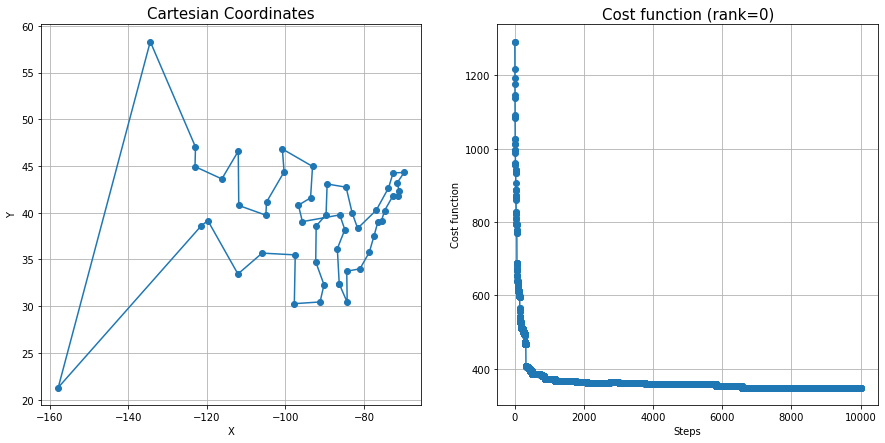

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("es_migration/output.distance.dat",usecols=(0), delimiter=' ',   unpack='true')
f=np.loadtxt("es_migration/output.distance.dat",usecols=(1), delimiter=' ', unpack='true')


x1= np.loadtxt("es_migration/output.coord.dat",usecols=(2), delimiter=' ',   unpack='true')
f1=np.loadtxt("es_migration/output.coord.dat",usecols=(3), delimiter=' ', unpack='true')
obj=np.loadtxt("es_migration/output.distance.dat",usecols=(0), delimiter=' ', unpack='true')
fig,axs = plt.subplots(1, 2,figsize=(15,15))


axs[0].plot(x1,f1,marker='o')
axs[0].set_title('Cartesian Coordinates', fontsize=15)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].plot(data=obj)
axs[0].grid(True)
axs[0].set_box_aspect(1)

axs[1].plot(x,f,marker='o')
axs[1].set_title('Cost function (rank=0)', fontsize=15)
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Cost function')
axs[1].grid(True)
axs[1].set_box_aspect(1)

plt.show()

One can observe that it needs a lot of more steps for convergence to the best sequence with 50 cities and probably it is not reached because two trajectors cross. This problem is not solved also using 15000 steps, but this code reaches this sequence in $\sim 6500$ steps.

## Migration disabled

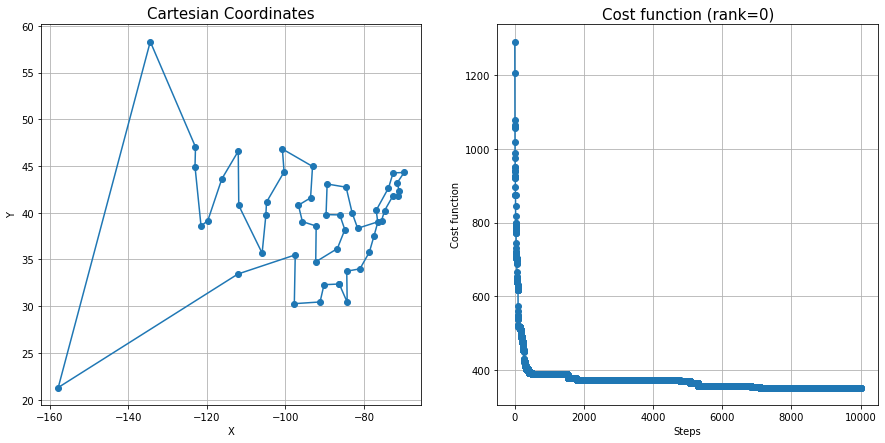

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x= np.loadtxt("es_no_migration/output.distance.dat",usecols=(0), delimiter=' ',   unpack='true')
f=np.loadtxt("es_no_migration/output.distance.dat",usecols=(1), delimiter=' ', unpack='true')

x1= np.loadtxt("es_no_migration/output.coord.dat",usecols=(2), delimiter=' ',   unpack='true')
f1=np.loadtxt("es_no_migration/output.coord.dat",usecols=(3), delimiter=' ', unpack='true')

fig,axs = plt.subplots(1, 2,figsize=(15,15))


axs[0].plot(x1,f1,marker='o')
axs[0].set_title('Cartesian Coordinates', fontsize=15)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)
axs[0].set_box_aspect(1)

axs[1].plot(x,f,marker='o')
axs[1].set_title('Cost function (rank=0)', fontsize=15)
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Cost function')
axs[1].grid(True)
axs[1].set_box_aspect(1)

plt.show()

This plot shows that this configuration recquires more steps for convergence: infact, this test is worse  than the past one without using parallelism: it reaches 351 distance unit against 349 than previous simulation after more steps.

One can check that the previous simulation has an intersection in trajectory that this one doesn't have: parallelism guarantees more information broadcasting and a faster convergence to better values, but sometimes it can stops a "good mutation". Infact, monitoring distance value in parallel simulation this measure increases, because of a forced broadcasting: it should be introduced a parameter which enables or not a broadcasting.